## Multiple Linear Regresison

Given a dataset containing area (sqm), number of bedrooms, number of floors, age and price of a set of houses, create a model for predicting house prices.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Load and visualize data

In [67]:
data = pd.read_csv('../data/3_04/homeprices.csv')
data.head()

,area,bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [68]:
# split the data into features and target var
X = np.array(data.loc[:, ['area', 'bedrooms', 'floors', 'age']])   # features
y = np.array(data.loc[:,'price'])   # target

# loc gets rows/columns with particular labels. iloc gets rows/columns at integer locations.

#### Plot relation of all features to price 

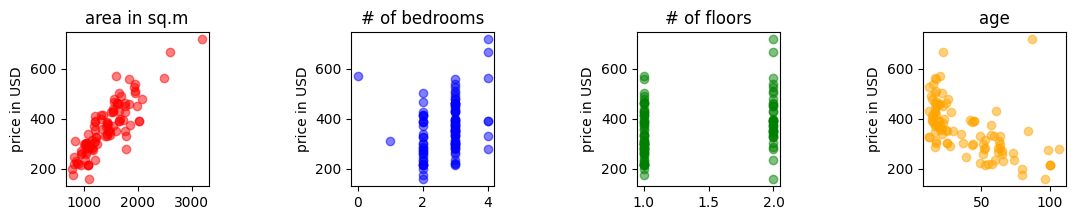

In [69]:
fig, axes = plt.subplots(1, 4, figsize=(20, 2)) 
for i, (label, color) in enumerate([
    ("area in sq.m", 'red'),
    ("# of bedrooms", 'blue'),
    ("# of floors", 'green'),
    ("age", 'orange')
]):
    axes[i].scatter(X[:, i], y, marker='o', color=color, alpha=0.5)
    axes[i].set_title(label)
    axes[i].set_ylabel("price in USD")
plt.subplots_adjust(left=0.5, right=1, wspace=1)
plt.show()

#### Split the data into trainin and testing sets 

In [70]:
# split the data into trainin and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (80, 4) (80,)
Testing set shape:  (20, 4) (20,)


#### Var 1 >> multiple regression model from scratch

In [71]:
def compute_cost(X, y, w, b):
    m = X.shape[0]  # number of sample vectors
    cost = 0.0
    
    for i in range(m):
        cost = cost + (np.dot(X[i],w) + b - y[i])**2    
    cost = cost / (2*m)
    
    return cost

In [72]:
def compute_gradient(X, y, w, b):
    m, n = X.shape # number of samples, number of features
    dj_dw = np.zeros(n,) # the gradient of the cost with respect to w
    dj_db = 0. # the gradient of the cost with respect to b
    
    for i in range(m):
        diff = np.dot(X[i],w) + b - y[i]
    
        for j in range(n):
            dj_dw[j] = dj_dw[j] + diff * X[i,j]
    
        dj_db = dj_db + diff  
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    return dj_db, dj_dw

In [73]:
def gradient_descent(X, y, w_init, b_init, cost_func, gradient_func, alpha, num_iters): 
    w = copy.deepcopy(w_init)
    b = b_init
    
    for i in range (num_iters):
        dj_db, dj_dw = gradient_func(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % math.ceil (num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_func(X, y, w, b):8.2f} ")
    
    return w, b
                

In [74]:
w_init = np.zeros(n) 
b_init = 0.
iterations = 1000
alpha = 5.0e-7

w, b = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)
print(f"\nw, b found by fradient descent: {b:0.5f}, {w}")

Iteration    0: Cost  2227.38 
Iteration  100: Cost  1642.00 
Iteration  200: Cost  1626.16 
Iteration  300: Cost  1611.64 
Iteration  400: Cost  1598.33 
Iteration  500: Cost  1586.11 
Iteration  600: Cost  1574.91 
Iteration  700: Cost  1564.64 
Iteration  800: Cost  1555.22 
Iteration  900: Cost  1546.58 

w, b found by fradient descent: 0.00323, [ 0.25821732 -0.00326681 -0.00334321 -0.23742641]


#### Calculate and plot predictions

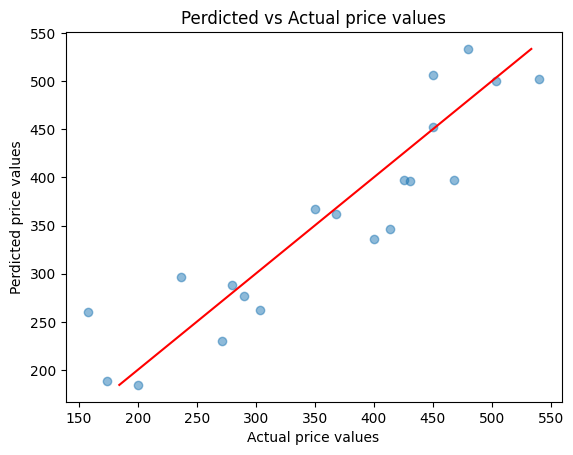

In [75]:
m, n = X_test.shape
y_pred = [np.dot(X_test[i], w) for i in range(m)]  

y_pred_min = min(y_pred)
y_pred_max= max(y_pred)

# The red reference line represents the line where predicted y = actual y (line: y = x)
# It helps you see how close the points are to perfect predictions.
# Ideally, they should be as close as possible to this red line.
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_pred_min, y_pred_max], [y_pred_min, y_pred_max], color="red")  # x-coordinates, y-coordinates, color
plt.xlabel("Actual price values")
plt.ylabel("Perdicted price values")
plt.title("Perdicted vs Actual price values")
plt.show()

#### Var 2 >> multiple regression model  with scikit-learn

https://www.youtube.com/watch?v=lGg0LNZplVQ

#### Create model 

lr = LinearRegression()

#### Train the model on the training set 

In [76]:
# Train the model on the training set

lr.fit(X_train, y_train)

print("Weights (w):", lr.coef_)
print("Bias (b):", lr.intercept_)

Weights (w): [  0.27336303 -33.99399291 -72.14701933  -1.42991285]
Bias (b): 222.10580513061927


#### Predict price on the teststing set 

In [77]:
y_pred = lr.predict(X_test)

#### Evaluate the performace of the model

In [78]:
# variance of the target variable explained by the independent variables, shows how well model fits the data / higher is better
r2 = r2_score(y_test, y_pred) 

# average squared distance between predicted and actual values / lower is better
mse =  mean_squared_error(y_test, y_pred)

# average absolute distance between predicted and actual values / lower is better
mae = mean_absolute_error(y_test, y_pred)

# starting point of the regression line on the y-axis, shows the value of target variable when features are zero 
# if postivie - target increases, as features increase 
# if negative - target increases, as features decrease 
intercept = lr.intercept_

print("R2 score: ", r2)
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("Intercept: ", intercept)

R2 score:  0.9527279307251016
Mean squared error:  585.5868011049644
Mean absolute error:  20.713806827242383
Intercept:  222.10580513061927


#### Plot predictions 

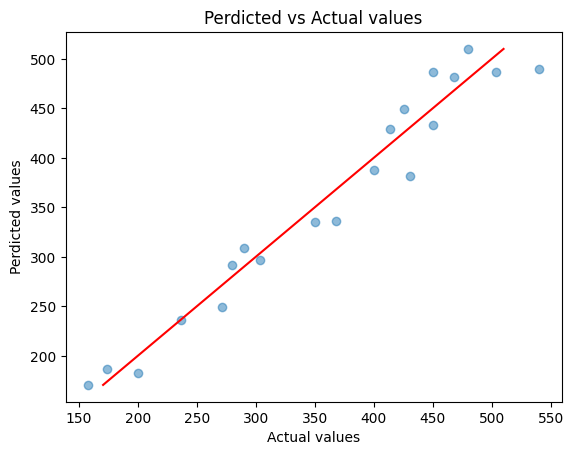

In [79]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Perdicted values")
plt.title("Perdicted vs Actual values")
plt.show()

#### Plot residuals against the predicted values of the target variable

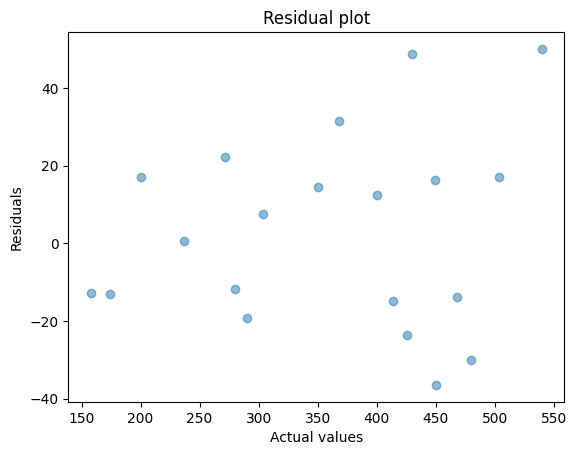

In [80]:
# If the model is fitting data well, the residual plot should show a random scatter of the points around zero with no discernable trend.

plt.scatter(y_test, y_test - y_pred, alpha=0.5) 
plt.xlabel("Actual values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()